In [1]:
!pip install tensorflow keras opencv-python-headless matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sinhadhossainfahim","key":"ea2928cdeb741c32e28cc5d08a3128ba"}'}

In [4]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data
!unzip fracture-multi-region-x-ray-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dropout

# Load a more complex model base
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add dropout for regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze all layers
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # Increase epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    class_weight={0: 1.0, 1: 2.0}  # Adjust based on your class distribution
)


234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8654 - loss: 0.4104

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


288/288 ━━━━━━━━━━━━━━━━━━━━ 534s 1s/step - accuracy: 0.8656 - loss: 0.4097 - val_accuracy: 0.5950 - val_loss: 0.6860
Epoch 2/20
  1/288 ━━━━━━━━━━━━━━━━━━━━ 3:21 700ms/step - accuracy: 0.9375 - loss: 0.1385

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9375 - loss: 0.1385 - val_accuracy: 0.5517 - val_loss: 0.7137
Epoch 3/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 274s 748ms/step - accuracy: 0.9768 - loss: 0.0835 - val_accuracy: 0.4812 - val_loss: 0.7037
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.4828 - val_loss: 0.7119
Epoch 5/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 264s 757ms/step - accuracy: 0.9912 - loss: 0.0354 - val_accuracy: 0.7050 - val_loss: 0.7207
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.9375 - loss: 0.0869 - val_accuracy: 0.7241 - val_loss: 0.5559
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 260s 755ms/step - accuracy: 0.9837 - loss: 0.0623 - val_accuracy: 0.9112 - val_loss: 0.2367
Epoch 8/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 0.9310 - val_loss: 0.2153
Epoch 9/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 261s 758ms/step - accuracy: 0.9925 - loss: 0.0351 - val_

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for correct label ordering in evaluation
)


Found 506 images belonging to 2 classes.


In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 871ms/step - accuracy: 0.9734 - loss: 0.0880
Test Loss: 0.10062523186206818
Test Accuracy: 0.9822134375572205


16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 847ms/step


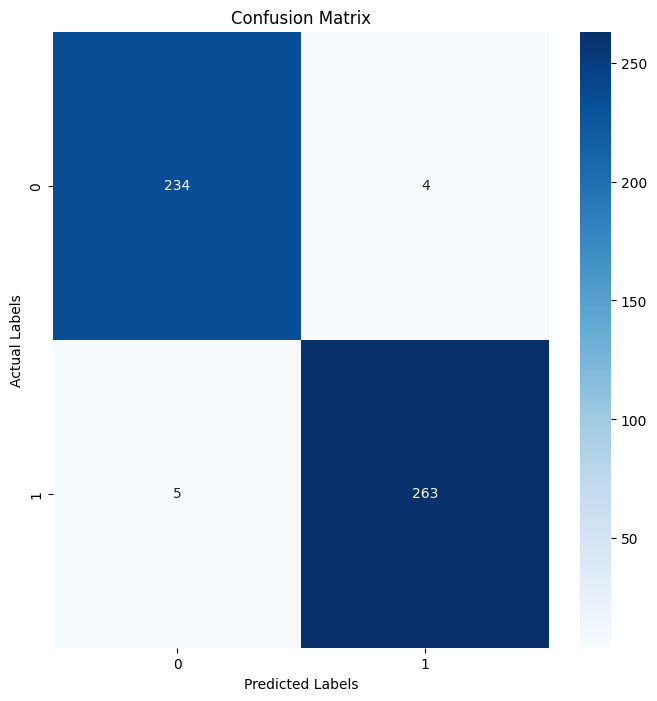

               precision    recall  f1-score   support

Not Fractured       0.98      0.98      0.98       238
    Fractured       0.99      0.98      0.98       268

     accuracy                           0.98       506
    macro avg       0.98      0.98      0.98       506
 weighted avg       0.98      0.98      0.98       506



In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = (model.predict(test_generator) > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Report
print(classification_report(true_labels, predictions, target_names=['Not Fractured', 'Fractured']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


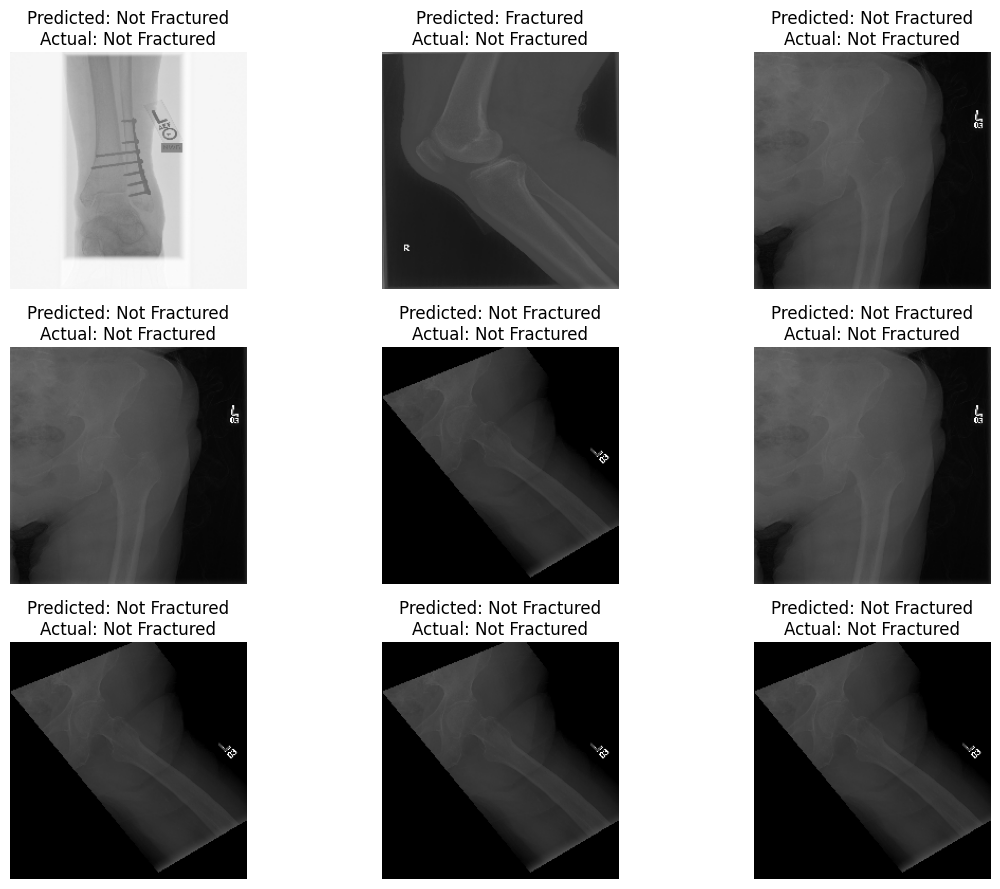

In [12]:
import matplotlib.pyplot as plt

# Assuming test_generator is reset or freshly created for consistent indexing
test_generator.reset()
x_batch, y_batch = next(test_generator)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = x_batch[i]
    pred = model.predict(np.expand_dims(img, axis=0))
    plt.imshow(img)
    plt.title(f'Predicted: {"Fractured" if pred > 0.5 else "Not Fractured"}\nActual: {"Fractured" if y_batch[i] > 0.5 else "Not Fractured"}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming test_generator is reset or freshly created for consistent indexing
test_generator.reset()
x_batch, y_batch = next(test_generator)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = x_batch[i]
    pred = model.predict(np.expand_dims(img, axis=0))
    plt.imshow(img)
    plt.title(f'Predicted: {"Fractured" if pred > 0.5 else "Not Fractured"}\nActual: {"Fractured" if y_batch[i] > 0.5 else "Not Fractured"}')
    plt.axis('off')
plt.tight_layout()
plt.show()